In [1]:
from symbulate import *
%matplotlib inline

# Coin flips - heads, tails

In [4]:
P = BoxModel([0, 1], size = 3)
X = RV(P, sum)
Y = 3 - X

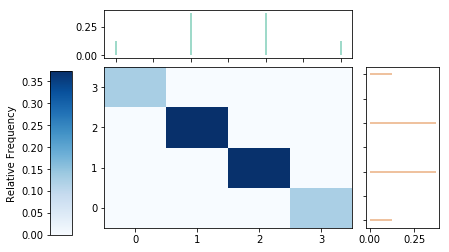

In [5]:
(X & Y).sim(10000).plot(['tile', 'marginal'])

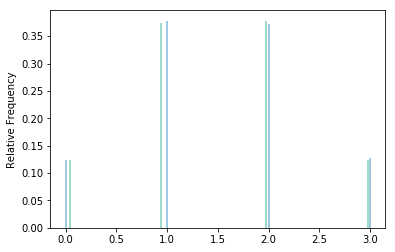

In [6]:
X.sim(10000).plot()
Y.sim(10000).plot(jitter=True)

In [7]:
X.sim(10000).tabulate()

0,1237
1,3668
2,3788
3,1307
Total,10000


In [8]:
Y.sim(10000).tabulate()

0,1259
1,3718
2,3770
3,1253
Total,10000


# Coin flips - heads, longest streak of heads

First define a function that counts the longest streak of H.  There are probably easier/better ways of doing this.

In [30]:
def longest_streak_H(flips):
    current = 0
    streak_lengths = []
    for i, flipi in enumerate(flips):
        if flipi == 1:
            current += 1
        else:
            streak_lengths.append(current)
            current = 0
    streak_lengths.append(current)
    return(max(streak_lengths))

In [32]:
longest_streak_H([0, 1, 1])

2

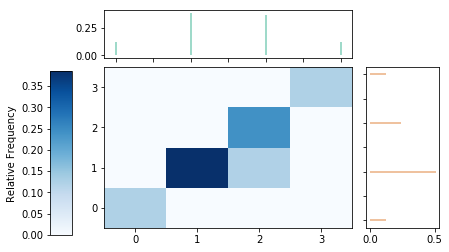

In [33]:
P = BoxModel([0, 1], size = 3)
X = RV(P, sum)
Z = RV(P, longest_streak_H)

(X & Z).sim(10000).plot(['tile', 'marginal'])

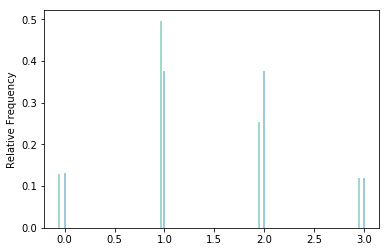

In [34]:
X.sim(10000).plot()
Z.sim(10000).plot(jitter = True)

In [35]:
(X == Z).sim(10000).tabulate()

False,1246
True,8754
Total,10000


In [36]:
Z.sim(10000).tabulate()

0,1284
1,5005
2,2476
3,1235
Total,10000


# Benford's law

In [43]:
xs = list(range(1, 9 + 1))
xs

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [44]:
ps = [log(1 + 1 / x, 10) for x in xs]
ps

[0.30102999566398114,
 0.17609125905568124,
 0.1249387366082999,
 0.0969100130080564,
 0.0791812460476248,
 0.06694678963061322,
 0.057991946977686726,
 0.051152522447381284,
 0.04575749056067514]

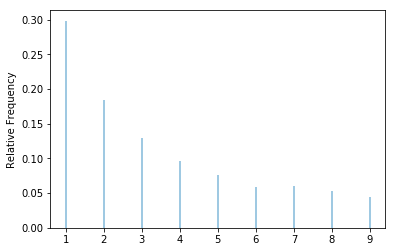

In [56]:
P = BoxModel(xs, probs=ps)
X = RV(P)
x = X.sim(10000)
x.plot()

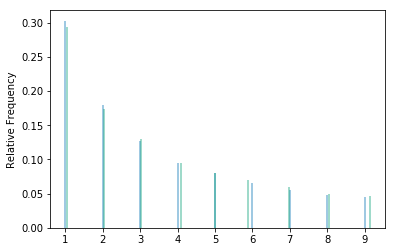

In [57]:
U = RV(Uniform(0, 1))
Y = floor(10 ** U)
Y.sim(10000).plot()
X.sim(10000).plot(jitter=True)